## Compare the NCBI dataset with the Ensemble dataset

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib_venn

In [2]:
sfari= pd.read_csv("sfari_ed_01_16_2024.csv")
#sfari= sfari[sfari["gene-score"] <=1]
sfari= sfari["ensembl-id"]


krishnan= pd.read_csv("Krishnan_genes.csv")

positive= set(sfari)
negative= set(krishnan["gene id"])

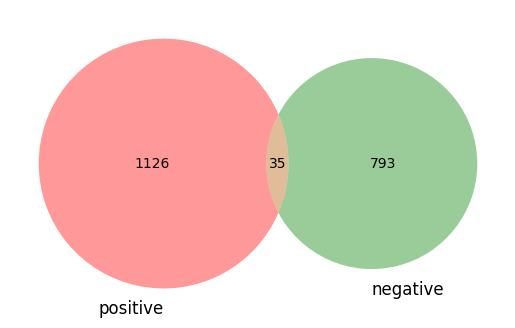

In [3]:
matplotlib_venn.venn2([positive, negative ], set_labels=["positive", "negative" ])

In [4]:
cross =positive & negative
len(cross)

35

In [5]:
negative= negative - cross

positive=pd.DataFrame(positive)
positive["y"]=1
negative=pd.DataFrame(negative)
negative["y"]=0

gene_list= pd.concat([positive, negative])
gene_list.columns=["gene", "y"]
gene_list.head(11)

,gene,y
0,ENSG00000138650,1
1,ENSG00000147133,1
2,ENSG00000165476,1
3,ENSG00000186153,1
4,ENSG00000075043,1
5,ENSG00000064787,1
6,ENSG00000071242,1
7,ENSG00000127663,1
8,ENSG00000148948,1
9,ENSG00000166987,1


In [7]:
print(gene_list["y"].value_counts())

1    1161
0     793
Name: y, dtype: int64


In [8]:
gene_list.to_csv("gene_list_krs_clean.csv", index=False)